# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
___

In [248]:
import tensorflow as tf
import keras

In [249]:
print(f'Tensorflow Version {tf.__version__}')

Tensorflow Version 2.13.0


In [250]:
print(f'Keras Version {keras.__version__}')

Keras Version 2.13.1


# Q2. Load the Wine Quality dataset and explore its dimensions. 
___

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [252]:
wines = pd.read_csv('wine_quality_dataset.csv')

In [253]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [254]:
wines.shape

(1599, 12)

In [255]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [256]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [257]:
corr_metrics = wines.corr(method='spearman',numeric_only=True)
corr_metrics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330


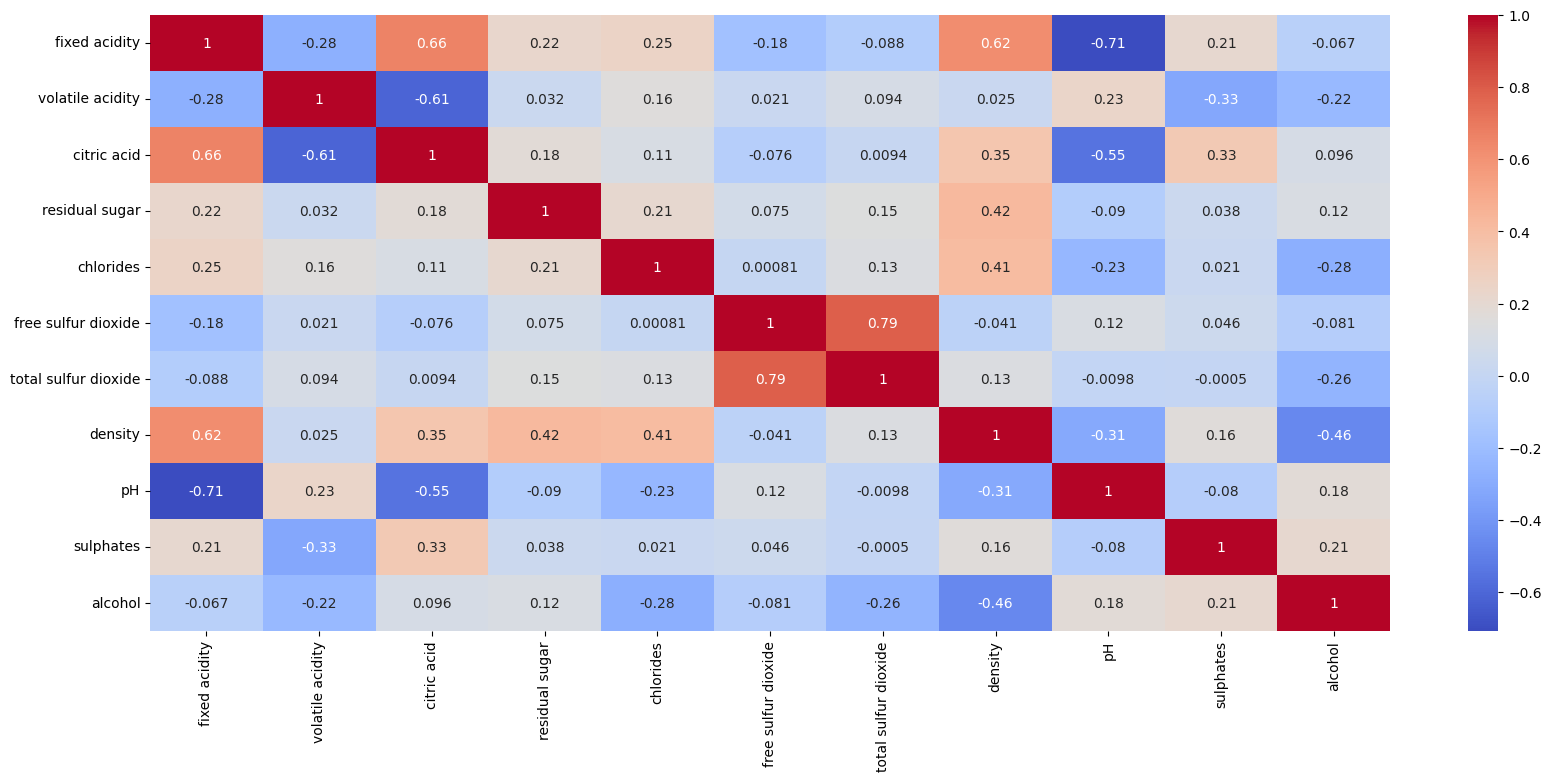

In [258]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_metrics, annot=True, cmap='coolwarm')
plt.show()

# Q3. Check for null values, identify categorical variables, and encode them.
___

In [259]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [260]:
# Label Encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
wines['quality'] = lb.fit_transform(wines['quality'])

In [261]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Q4. Separate the features and target variables from the dataset.
___

In [262]:
X = wines.drop('quality', axis=1)
y = wines.quality

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
___

In [263]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

In [264]:
print(X_train_full.shape, y_train_full.shape) # Full Training Set

(1279, 11) (1279,)


In [265]:
print(X_test.shape, y_test.shape) # Test Set

(320, 11) (320,)


In [266]:
print(X_train.shape, y_train.shape) # Training Set

(1023, 11) (1023,)


In [267]:
print(X_valid.shape, y_valid.shape) # Validation Set

(256, 11) (256,)


# Q6. Scale the dataset using an appropriate scaling technique.
___

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
___

In [269]:
from keras.layers import InputLayer,Dense

In [270]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

11

In [271]:
# defining number of output neurons
output_neurons = len(np.unique(y_train))
output_neurons

2

In [272]:
# defining hidden layers and neurons in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.
___

In [273]:
from keras.models import Sequential

In [274]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='elu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='elu'))
model.add(Dense(units=output_neurons, activation='tanh'))

# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
___

In [275]:
%reload_ext tensorboard

In [276]:
!rd /s /q logs

In [277]:
from keras.callbacks import TensorBoard

In [278]:
tensorboard = TensorBoard(log_dir='logs')

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
___

In [279]:
from keras.callbacks import EarlyStopping

In [280]:
early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.01)

# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
___

In [281]:
from keras.callbacks import ModelCheckpoint

In [282]:
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='loss', save_best_only=True,)

# Q12. Print the summary of the model architecture.
___

In [283]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                120       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 2)                 12        
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q13. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
___

In [284]:
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']

# Q14. Compile the model with the specified loss function, optimizer, and metrics.
___

In [285]:
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)

# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
___

In [286]:
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1000,callbacks=[early_stopping,model_checkpoint,tensorboard])

Epoch 1/1000
32/32 [==============================] - 1s 6ms/step - loss: 4.4204 - accuracy: 0.3529 - val_loss: 3.5178 - val_accuracy: 0.3828
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 3.7416 - accuracy: 0.3597 - val_loss: 3.1535 - val_accuracy: 0.3594
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 3.3793 - accuracy: 0.3509 - val_loss: 2.9004 - val_accuracy: 0.3711
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 3.0847 - accuracy: 0.3812 - val_loss: 2.6316 - val_accuracy: 0.3633
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 2.8202 - accuracy: 0.3900 - val_loss: 2.4355 - val_accuracy: 0.3945
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 2.4929 - accuracy: 0.4223 - val_loss: 2.0259 - val_accuracy: 0.4023
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.1933 - accuracy: 0.4047 - val_loss: 1.7451 - val_accuracy: 0.3789
Epoch 

In [287]:
# ModelCheckPoint saves least loss model
model_checkpoint.best

0.6891754269599915

### Launching TensorBoard Interactive Window 

In [288]:
%tensorboard --logdir logs --port 5000

Reusing TensorBoard on port 5000 (pid 12212), started 0:16:47 ago. (Use '!kill 12212' to kill it.)

# Q16. Obtain the model's parameters (weights and biases).
___

In [289]:
print(model.weights)

[<tf.Variable 'dense_12/kernel:0' shape=(11, 10) dtype=float32, numpy=
array([[ 0.12684366, -0.09435194, -0.41650373, -0.04112345,  0.35721618,
         0.02312896, -0.46665305, -0.22421989, -0.31741378, -0.4496731 ],
       [-0.2599775 ,  0.17598222, -0.26061946,  0.02854928,  0.29514438,
        -0.0791732 ,  0.19997121,  0.03769185,  0.21046762, -0.11919166],
       [ 0.4342472 , -0.29556918,  0.2542869 ,  0.35746428,  0.4622293 ,
         0.17206375,  0.4513741 ,  0.3201127 ,  0.03309047, -0.25117743],
       [ 0.14409989,  0.3812426 ,  0.39665547, -0.14057815,  0.04909178,
        -0.16803181, -0.42471832,  0.44716218,  0.32116553, -0.02350205],
       [-0.24915177, -0.00065905, -0.29698756,  0.01922321,  0.29482058,
        -0.2825306 , -0.225876  , -0.21371786, -0.05214179,  0.5455709 ],
       [-0.3017123 , -0.36972123,  0.19936973, -0.30956373, -0.07049828,
         0.23791575,  0.31155506, -0.16663122,  0.02288728,  0.09732912],
       [ 0.20190787, -0.03304735, -0.33862254, 

# Q17. Store the model's training history as a Pandas DataFrame.
___

In [290]:
model_history_df = pd.DataFrame(model_history.history)

In [291]:
model_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,4.420409,0.352884,3.517834,0.382812
1,3.741608,0.359726,3.153470,0.359375
2,3.379321,0.350929,2.900363,0.371094
3,3.084671,0.381232,2.631635,0.363281
4,2.820226,0.390029,2.435525,0.394531


# Q18. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
___

### Visualizing history for loss

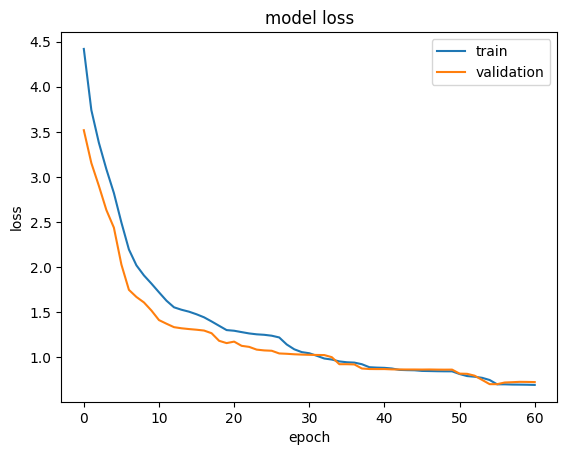

In [292]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Visualizing history for accuracy

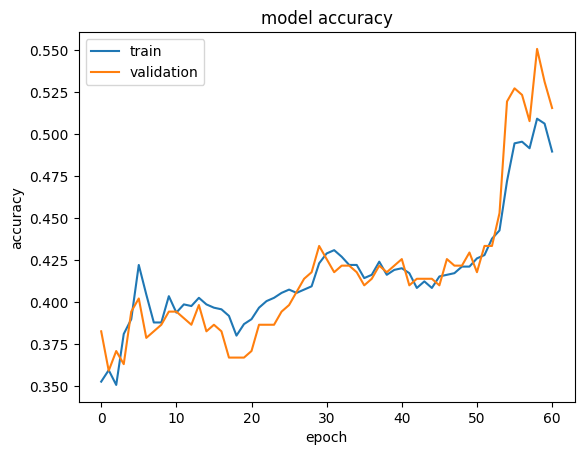

In [293]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Q19. Evaluate the model's performance using the test dataset and report relevant metrics.
___

In [294]:
y_pred_probabilities = model.predict(X_test)

10/10 [==============================] - 0s 890us/step


In [295]:
y_pred_probabilities

array([[ 4.12188023e-01,  3.62888545e-01],
       [ 1.21079996e-01,  4.17731926e-02],
       [ 6.03749990e-01,  6.33831382e-01],
       [ 4.93340194e-01,  5.20213723e-01],
       [ 6.97067261e-01,  7.88000286e-01],
       [ 1.94621637e-01,  2.81099766e-01],
       [ 1.12166889e-01, -2.89022997e-02],
       [ 2.38072589e-01,  1.23104781e-01],
       [ 6.17399454e-01,  6.24208570e-01],
       [ 6.36297286e-01,  7.93501437e-01],
       [ 8.79795790e-01,  8.11572492e-01],
       [ 4.73495692e-01,  3.54393572e-01],
       [ 4.72639948e-01,  5.29662967e-01],
       [ 1.29849195e-01,  1.92759156e-01],
       [ 3.56908202e-01,  4.79164332e-01],
       [ 9.51278269e-01,  8.77064049e-01],
       [ 2.17978269e-01,  1.83944497e-02],
       [ 6.24708772e-01,  6.60152435e-01],
       [ 9.37060535e-01,  9.27578151e-01],
       [ 2.12291509e-01,  2.70719618e-01],
       [ 2.43087843e-01, -6.98849442e-04],
       [ 1.21542431e-01,  1.96213424e-01],
       [ 7.32689321e-01,  8.08347642e-01],
       [ 9.

In [296]:
# Converting predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

In [297]:
y_pred_labels

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

### Evaluating model's accuracy using accuracy_score

In [298]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [299]:
print(f'Accuracy: {accuracy_score(y_test,y_pred_labels)*100} %')

Accuracy: 44.6875 %


In [300]:
print('Confusion Matirix:')
print(confusion_matrix(y_test,y_pred_labels))

Confusion Matirix:
[[ 78  63]
 [114  65]]


In [301]:
print('Classification Report:')
print(classification_report(y_test,y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.55      0.47       141
           1       0.51      0.36      0.42       179

    accuracy                           0.45       320
   macro avg       0.46      0.46      0.45       320
weighted avg       0.46      0.45      0.44       320



# ModelCheckPoint Training

In [302]:
chk_point_model = keras.models.load_model('best_model.h5')

In [303]:
chk_point_model_history = chk_point_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1000,callbacks=[early_stopping,model_checkpoint,tensorboard])

Epoch 1/1000
32/32 [==============================] - 1s 9ms/step - loss: 0.6883 - accuracy: 0.4907 - val_loss: 0.7419 - val_accuracy: 0.5156
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.4946 - val_loss: 0.7231 - val_accuracy: 0.5039
Epoch 3/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.4936 - val_loss: 0.7169 - val_accuracy: 0.5117
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.4936 - val_loss: 0.7398 - val_accuracy: 0.5117
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.4936 - val_loss: 0.7169 - val_accuracy: 0.5078
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.4946 - val_loss: 0.7401 - val_accuracy: 0.5078


In [304]:
print(chk_point_model.weights)

[<tf.Variable 'dense_12/kernel:0' shape=(11, 10) dtype=float32, numpy=
array([[ 0.12836541, -0.08780505, -0.41714022, -0.04378998,  0.35917312,
         0.019181  , -0.46460044, -0.22868894, -0.3108501 , -0.44844043],
       [-0.25237828,  0.17754973, -0.2654931 ,  0.02456548,  0.29820636,
        -0.07657976,  0.1977557 ,  0.04060638,  0.20888916, -0.12806492],
       [ 0.42722112, -0.29604605,  0.25661346,  0.3624298 ,  0.45825443,
         0.17572248,  0.44714227,  0.3175309 ,  0.03223815, -0.24709736],
       [ 0.14723931,  0.38068447,  0.39389068, -0.14079677,  0.04641288,
        -0.16700657, -0.41415706,  0.44415027,  0.3199146 , -0.01777017],
       [-0.25435472, -0.0042105 , -0.29146323,  0.02062647,  0.29351664,
        -0.27967903, -0.22602473, -0.21453567, -0.0557393 ,  0.5446528 ],
       [-0.309525  , -0.36965367,  0.20276375, -0.30486366, -0.06582876,
         0.22628108,  0.3338393 , -0.16464384,  0.02258815,  0.09049708],
       [ 0.18409538, -0.04226214, -0.32940045, 

### Visualizing history for loss

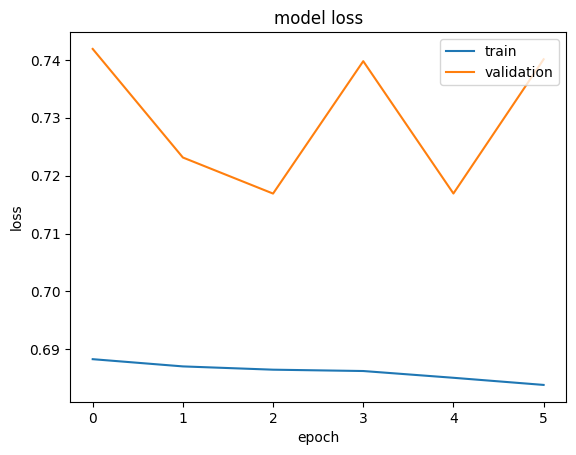

In [305]:
plt.plot(chk_point_model_history.history['loss'])
plt.plot(chk_point_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Visualizing history for accuracy

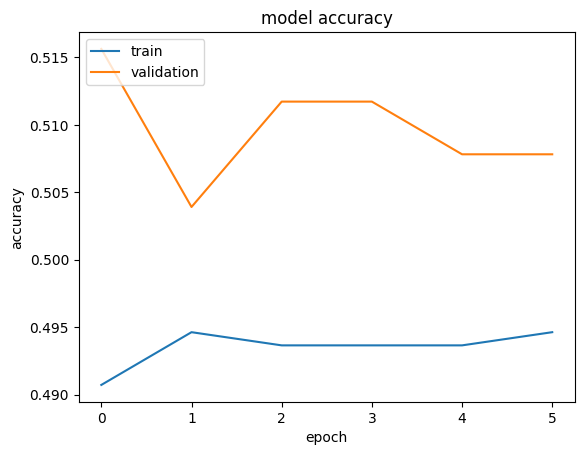

In [306]:
plt.plot(chk_point_model_history.history['accuracy'])
plt.plot(chk_point_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [307]:
y_pred_probabilities = chk_point_model.predict(X_test)

10/10 [==============================] - 0s 844us/step


In [308]:
y_pred_probabilities

array([[ 4.08000827e-01,  3.72505903e-01],
       [ 1.16024859e-01,  5.95103800e-02],
       [ 5.89755237e-01,  6.30077422e-01],
       [ 4.40277070e-01,  4.82360452e-01],
       [ 7.07026005e-01,  7.94248104e-01],
       [ 1.51017591e-01,  2.45732427e-01],
       [ 1.02150694e-01,  1.07870938e-03],
       [ 2.32772604e-01,  1.16744503e-01],
       [ 6.35271430e-01,  6.37604773e-01],
       [ 6.53049409e-01,  7.98820019e-01],
       [ 8.79494607e-01,  8.16408098e-01],
       [ 4.81395930e-01,  3.54291528e-01],
       [ 4.77522075e-01,  5.40030956e-01],
       [ 1.13974206e-01,  1.86328977e-01],
       [ 3.50402057e-01,  4.72757548e-01],
       [ 9.53298151e-01,  8.85467649e-01],
       [ 2.12486684e-01,  4.12730947e-02],
       [ 6.12934053e-01,  6.54456973e-01],
       [ 9.41590488e-01,  9.32378650e-01],
       [ 2.12843135e-01,  2.87908942e-01],
       [ 2.10560367e-01, -6.16317950e-02],
       [ 1.25434235e-01,  2.02549338e-01],
       [ 7.45319903e-01,  8.11102748e-01],
       [ 9.

In [309]:
# Converting predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

In [310]:
y_pred_labels

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

### Evaluating model's accuracy using accuracy_score

In [311]:
print(f'Accuracy: {accuracy_score(y_test,y_pred_labels)*100} %')

Accuracy: 44.6875 %


In [312]:
print('Confusion Matirix:')
print(confusion_matrix(y_test,y_pred_labels))

Confusion Matirix:
[[ 77  64]
 [113  66]]


In [313]:
print('Classification Report:')
print(classification_report(y_test,y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.55      0.47       141
           1       0.51      0.37      0.43       179

    accuracy                           0.45       320
   macro avg       0.46      0.46      0.45       320
weighted avg       0.46      0.45      0.44       320

